<a href="https://colab.research.google.com/github/Sanjayme049/ML/blob/main/cat_dog_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import warnings
warnings.filterwarnings(action = 'ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# first_step : load the data and create batches

train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transform =  transforms.Compose([
        transforms.Resize(224),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [5]:
train_dataset = ImageFolder('/content/drive/MyDrive/DL/data/train', transform = train_transform)
test_dataset = ImageFolder('/content/drive/MyDrive/DL/data/test', transform = test_transform)

In [6]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

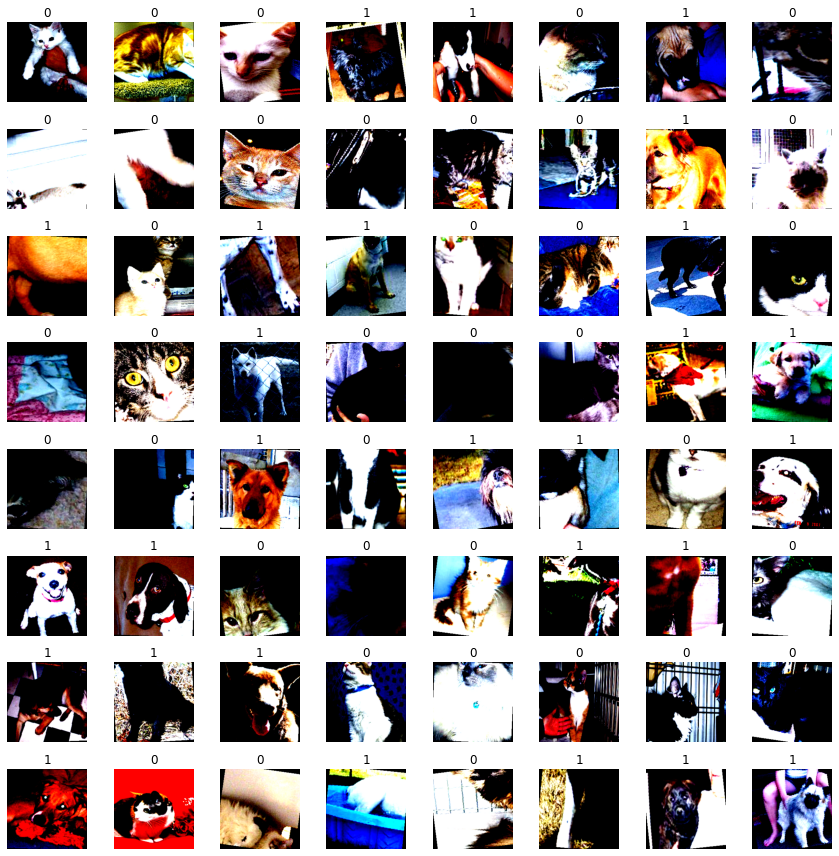

In [7]:
images, labels  = next(iter(train_dataloader))
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
cnt = 0
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(images[cnt].permute(1, 2, 0))
        ax[i][j].set_title(labels[cnt].detach().numpy())
        ax[i][j].axis('off')
        cnt += 1
        
plt.tight_layout()
plt.show()

In [8]:
# create a CNN architecture

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding = 1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv4 = nn.Conv2d(32, 64, 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*14*14, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()


In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [11]:
model.to(device)
criterion.to(device)


CrossEntropyLoss()

In [ ]:
# CrossEntropyLoss()


In [13]:
# This line to check wether my model is under or overfitting
# Min epoch =10
# Max epoch = 50
# For all the 16 images divide by 16 to keep the average

epoch = 50
train_loss_epoch = []
test_loss_epoch = []

for i in range(epoch):
    
    print(f'Started Training for Epoch {i} .....')
    model.train()
    train_loss = 0
    correct = 0
    
    for images , labels in train_dataloader:
        images = images.to(device) # Ext images and labels
        labels = labels.to(device)
        logits = model(images) # y hat produced
        loss = criterion(logits,labels) # J(theta) ready, now cal dj/d(theta)
        loss.backward() # Now cal multiple dj/d(theta) or called as Jacobian Matix 
        optimizer.step() # Gradient descent
        optimizer.zero_grad() # zeroing the grad as we don't need gradient while testing
        train_loss += loss / batch_size
        _ , predicted = torch.max(logits.data , 1)
        correct += (predicted == labels).sum().item()
        
    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for images,labels in test_dataloader:
            images = images.to(device) # Ext images and labels
            labels = labels.to(device)
            logits = model(images)
            loss = criterion(logits , labels)
            ## Write a code to check the test accuracy for each apoch
            test_loss += loss/batch_size
            _ , predicted = torch.max(logits.data , 1)
            test_correct += (predicted == labels).sum().item()
            
    train_loss_epoch.append(train_loss)
    test_loss_epoch.append(test_loss)
    
    print(f'Epoch: {i}')
    print(f'Training Loss: {train_loss}')
    print(f'Testing Loss: {test_loss}')
    print(f'Training Accuracy: { correct / ((len(train_dataset)//batch_size) * batch_size) }')
    print(f'Testing Accuracy: { test_correct / ((len(test_dataset)//batch_size) * batch_size) }')

print('------------------')
print('Training Completed')


Started Training for Epoch 0 .....
Epoch: 0
Training Loss: 0.6836549043655396
Testing Loss: 0.17200756072998047
Training Accuracy: 0.5231854838709677
Testing Accuracy: 0.546875
Started Training for Epoch 1 .....
Epoch: 1
Training Loss: 0.6548084616661072
Testing Loss: 0.1608823984861374
Training Accuracy: 0.6000504032258065
Testing Accuracy: 0.678125
Started Training for Epoch 2 .....
Epoch: 2
Training Loss: 0.6397498846054077
Testing Loss: 0.15768851339817047
Training Accuracy: 0.6106350806451613
Testing Accuracy: 0.653125
Started Training for Epoch 3 .....
Epoch: 3
Training Loss: 0.6272376179695129
Testing Loss: 0.15531326830387115
Training Accuracy: 0.6401209677419355
Testing Accuracy: 0.6833333333333333
Started Training for Epoch 4 .....
Epoch: 4
Training Loss: 0.6017796397209167
Testing Loss: 0.14988507330417633
Training Accuracy: 0.6625504032258065
Testing Accuracy: 0.70625
Started Training for Epoch 5 .....
Epoch: 5
Training Loss: 0.5930735468864441
Testing Loss: 0.1475311070680